# Problem Statments:
- We have to calculate the total compensation for each employee.
- The HR department is planning to provide some additional compensation to each working employee which needs to be calculated by looking at the profile of each employee and the benefits they are getting. 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train_set.csv')
data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [3]:
data.shape

(287836, 15)

### Observation:-
- There are total 287836 rows and 15 columns.
- Each row include the information of individual employee working in the company.

In [4]:
data.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [5]:
data.nunique()

Year                       4
OGC                        7
OG                         7
DC                        54
Dept                      54
UC                       789
Union                     73
JF                        55
Job                     1136
EI                     52403
Salaries              104444
Overtime               33632
H/D                   113669
YT                         2
Total_Compensation    155965
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [7]:
yrs_=data.groupby('Year',as_index=False).Total_Compensation.sum().sort_values('Total_Compensation',ascending=False)
yrs_

,Year,Total_Compensation
1,2014,8395033466
0,2013,8212269034
2,2015,7810552333
3,2016,3787289759


In year 2014 Compensation that was distributed was hight.

In [8]:
col_for_model = ['OGC','UC','EI','Salaries','Overtime','H/D','Total_Compensation']

In [9]:
data.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [16]:
df = data[col_for_model]
df.head()

,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
0,4,250,6725,12196,0,0.00,16158
1,4,39,25058,74639,2820,12703.31,115784
2,6,21,46108,100554,0,12424.50,144708
3,1,911,33369,140164,52754,13043.87,242323
4,2,21,28684,58813,0,7655.28,82106


# Seprating X and y from the dataset

In [17]:
X = df.drop('Total_Compensation',axis=1)
y = df['Total_Compensation']

# Seperating train and test from X and y

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Importing LinearRegression for prediction 

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

# Applying Ml algo to x_train and y_train

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

# Predicting value on x_test

In [21]:
y_pred = lr.predict(x_test)
y_pred

array([116493.50381586,  61132.11585208,  86879.88745237, ...,
       126149.26975572, 116058.53755752, 212124.15523417])

In [22]:
x_test

,OGC,UC,EI,Salaries,Overtime,H/D
37188,2,253,3733,64670,14082,13483.42000
43547,5,790,2635,38108,0,10230.58000
128478,1,790,21582,54756,0,12918.24848
106956,5,790,29560,748,0,269.89000
157292,2,790,22468,73379,0,12500.56000
...,...,...,...,...,...,...
113265,2,253,23738,66421,8316,13302.07000
267043,2,39,20501,50982,0,7611.00000
165790,2,253,8544,65941,20372,13972.61000
85812,3,21,5544,77908,0,12968.45603


In [23]:
# value of m
lr.coef_

array([-2.66641025e+02,  4.91907453e-01,  1.92131309e-03,  1.29856994e+00,
        1.18366150e+00,  1.12596180e+00])

In [24]:
# value of c
lr.intercept_

1066.5059297912958

In [25]:
# Checking the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9873425644263043

# Observation 
- Our model have accuracy of 98.73%


# Using cross validation for imporving our model

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,y,cv=10)

array([0.98705971, 0.98725967, 0.98879595, 0.98601991, 0.98559902,
       0.98890971, 0.98725774, 0.98675438, 0.9872994 , 0.98775399])

# Checking the error

In [33]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_pred,y_test))
mse


7617.552675398487

<AxesSubplot:ylabel='Total_Compensation'>

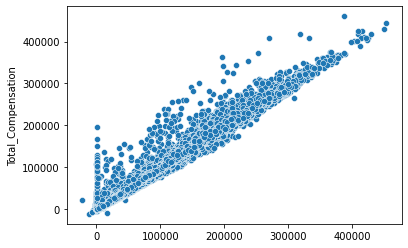

In [50]:
sns.scatterplot(x=y_pred,y=y_test)
